In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsforecast import StatsForecast
from statsforecast.models import AutoETS, AutoARIMA, AutoCES, AutoTheta
import seaborn as sns
from scipy import stats
import warnings

In [186]:
warnings.filterwarnings("ignore")

In [187]:
df = pd.read_csv("/Users/marcosherediapimienta/Library/Mobile Documents/com~apple~CloudDocs/Documents/Máster de Matemàtiques per els Instruments Financers/TFM/Time_Series/archive/Top10-2021-2024-1d.csv")

df_selected = df[['Timestamp', 'BTCUSDT']]
df_selected = df_selected.rename(columns={'Timestamp':'ds', 'BTCUSDT': 'y'})
df_selected = df_selected.dropna()

df_selected["unique_id"] = "1"
df_selected.columns = ["ds", "y", "unique_id"]

df_selected["ds"] = pd.to_datetime(df_selected["ds"])
df_selected

,ds,y,unique_id
0,2021-01-01,29331.69,1
1,2021-01-02,32178.33,1
2,2021-01-03,33000.05,1
3,2021-01-04,31988.71,1
4,2021-01-05,33949.53,1
...,...,...,...
1240,2024-05-25,69290.57,1
1241,2024-05-26,68507.67,1
1242,2024-05-27,69436.43,1
1243,2024-05-28,68398.39,1


In [201]:
Y_train_df = df_selected[df_selected.ds <= '2024-05-01']
Y_test_df = df_selected[df_selected.ds > '2024-05-01']

In [189]:
season_length = 12
horizon = len(Y_test_df)
models = [AutoETS(season_length=season_length), AutoARIMA(season_length=season_length), AutoCES(season_length=season_length), AutoTheta(season_length=season_length)]

sf = StatsForecast(df=Y_train_df,
                   models=models,
                   freq='D',
                   n_jobs=-1)

sf.fit()

StatsForecast(models=[AutoETS,AutoARIMA,CES,AutoTheta])

In [190]:
horizon = 28
levels = [99] 

forecast_df = sf.forecast(h=horizon, level = levels, fitted = True)
forecast_df = forecast_df.reset_index()
forecast_df.head()

,unique_id,ds,AutoETS,AutoETS-lo-99,AutoETS-hi-99,AutoARIMA,AutoARIMA-lo-99,AutoARIMA-hi-99,CES,CES-lo-99,CES-hi-99,AutoTheta,AutoTheta-lo-99,AutoTheta-hi-99
0,1,2024-05-02,58500.851562,53448.425781,63553.273438,58590.480469,55060.542969,62120.421875,58932.433594,54046.859375,63883.984375,58519.121094,55474.656250,61625.527344
1,1,2024-05-03,58500.644531,51546.441406,65454.843750,58429.542969,53598.296875,63260.789062,58963.210938,54057.015625,63956.648438,58566.652344,54104.804688,63367.199219
2,1,2024-05-04,58500.441406,50061.042969,66939.835938,58413.492188,52555.019531,64271.964844,59016.117188,53931.621094,64004.660156,58653.480469,53323.839844,64068.425781
3,1,2024-05-05,58500.242188,48798.984375,68201.500000,58398.480469,51668.265625,65128.699219,58993.488281,54001.621094,64013.765625,58595.566406,51905.019531,65644.859375
4,1,2024-05-06,58500.046875,47681.832031,69318.265625,58343.550781,50842.187500,65844.914062,58867.625000,53543.386719,63896.562500,58522.812500,51122.589844,64951.152344


In [191]:
forecast_df.tail()

,unique_id,ds,AutoETS,AutoETS-lo-99,AutoETS-hi-99,AutoARIMA,AutoARIMA-lo-99,AutoARIMA-hi-99,CES,CES-lo-99,CES-hi-99,AutoTheta,AutoTheta-lo-99,AutoTheta-hi-99
23,1,2024-05-25,58497.011719,34878.910156,82115.109375,58141.460938,42327.085938,73955.835938,58967.101562,53868.566406,63759.660156,58506.531250,39816.695312,73238.656250
24,1,2024-05-26,58496.882812,34386.941406,82606.828125,58152.042969,41986.656250,74317.429688,58943.296875,54057.019531,63895.605469,58519.121094,41048.921875,73514.070312
25,1,2024-05-27,58496.753906,33904.253906,83089.257812,58141.695312,41635.773438,74647.617188,58973.843750,54067.003906,63968.121094,58566.652344,41288.410156,73559.218750
26,1,2024-05-28,58496.632812,33430.312500,83562.945312,58134.117188,41294.347656,74973.882812,59027.125000,53941.699219,64016.210938,58653.480469,42395.820312,73910.570312
27,1,2024-05-29,58496.507812,32964.636719,84028.382812,58134.562500,40967.453125,75301.671875,59004.082031,54011.375000,64025.113281,58595.566406,41238.085938,73898.085938


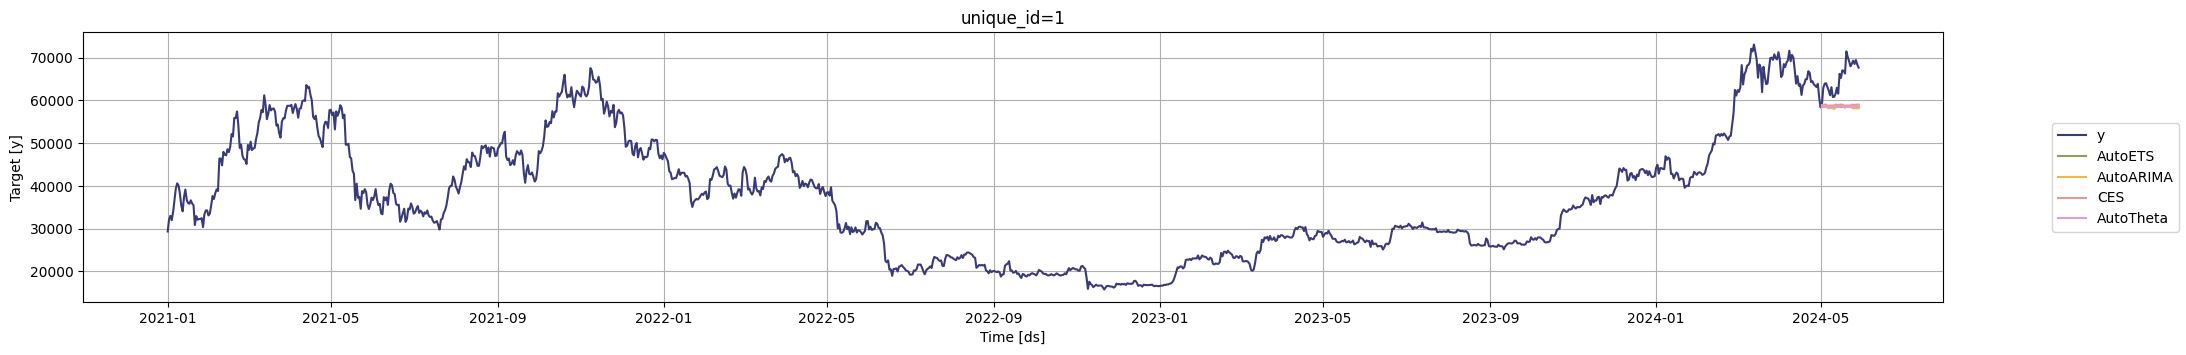

In [192]:
StatsForecast.plot(df_selected, forecast_df, plot_random = False)

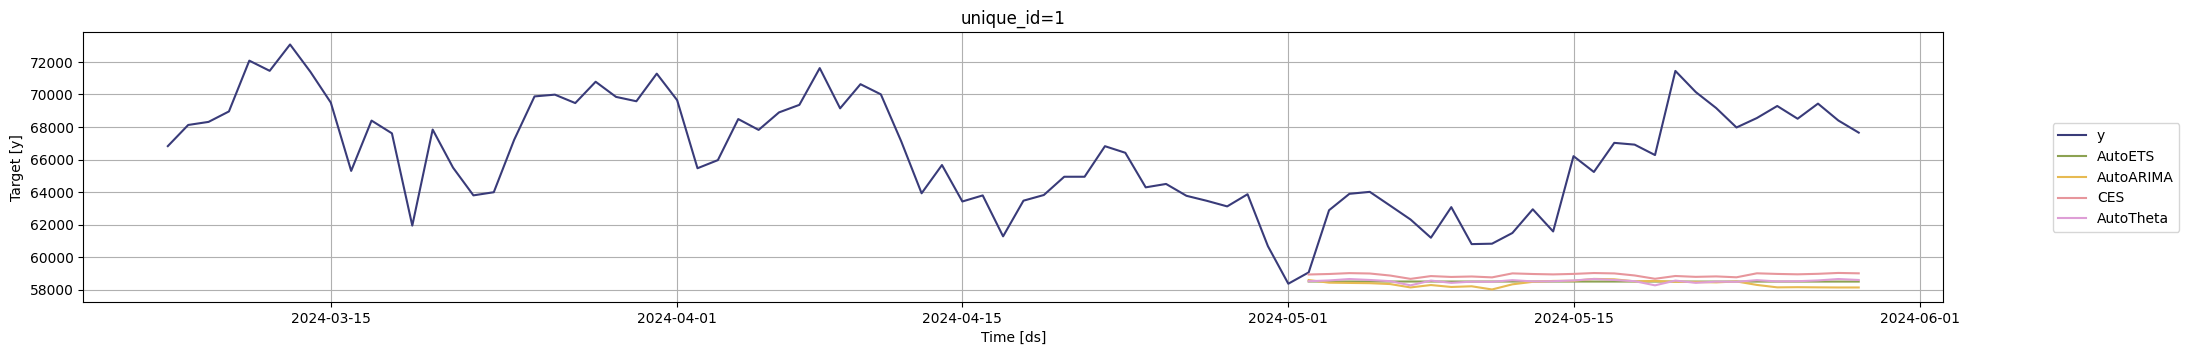

In [193]:
sf.plot(df_selected, forecast_df, max_insample_length=28*3, models=['AutoETS', 'AutoARIMA', 'CES', 'AutoTheta'])

In [205]:
# Asegurarse de que la columna 'ds' está presente en ambos DataFrames
if 'ds' not in Y_test_df.columns:
    Y_test_df = Y_test_df.reset_index().rename(columns={'index': 'ds'})
if 'ds' not in forecast_df.columns:
    forecast_df = forecast_df.reset_index().rename(columns={'index': 'ds'})

# Configurar los índices para los cálculos de error
Y_test_df = Y_test_df.set_index('ds')
forecast_df = forecast_df.set_index('ds')

# Asegurarse de que las fechas en los índices coincidan
Y_test_df = Y_test_df.loc[forecast_df.index]

# Definir funciones para calcular MAPE y sMAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

# Inicializar diccionarios para almacenar los errores de cada modelo
mape_results = {}
smape_results = {}

# Lista de nombres de los modelos
model_names = ['AutoETS','AutoARIMA', 'CES', 'AutoTheta']

# Calcular MAPE y sMAPE para cada modelo
for model_name in model_names:
    y_pred = forecast_df[model_name].values
    y_true = Y_test_df['y'].values
    mape_results[model_name] = mean_absolute_percentage_error(y_true, y_pred)
    smape_results[model_name] = symmetric_mean_absolute_percentage_error(y_true, y_pred)

# Mostrar los resultados
print("MAPE results:")
for model, mape in mape_results.items():
    print(f"{model}: {mape:.2f}%")

print("\nSMAPE results:")
for model, smape in smape_results.items():
    print(f"{model}: {smape:.2f}%")

MAPE results:
AutoETS: 10.23%
AutoARIMA: 10.44%
CES: 9.61%
AutoTheta: 10.19%

SMAPE results:
AutoETS: 10.90%
AutoARIMA: 11.14%
CES: 10.22%
AutoTheta: 10.86%
